In [1]:
from keras.models import Model , Sequential
from keras.layers import GlobalAveragePooling2D , Dropout , Dense , Activation
from keras.layers import Conv2D , BatchNormalization , Flatten , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import cv2
import numpy as np
from keras.preprocessing import image_dataset_from_directory

In [2]:
model = Sequential()

model.add(Conv2D(input_shape = (90,120,3), filters = 32, kernel_size = (5,5), strides = (1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (5,5), strides = (1,1)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
#model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

adam = Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 116, 86, 32)       2432      
_________________________________________________________________
activation (Activation)      (None, 116, 86, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 58, 43, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 54, 39, 128)       102528    
_________________________________________________________________
activation_1 (Activation)    (None, 54, 39, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 19, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 65664)             0

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.5,
                                   zoom_range=[0.8, 2.0],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

validate_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [6]:
save_path = 'D:/mask_data/split/'

train_generator = train_datagen.flow_from_directory(save_path+'train/',
                                                  batch_size=10,
                                                    target_size=(90,120),
                                                  class_mode='categorical')

validation_generator = validate_datagen.flow_from_directory(save_path+'validate/',
                                                      batch_size=10,
                                                        target_size=(90,120),
                                                      class_mode='categorical')

test_generator = test_datagen.flow_from_directory(save_path+'test/',
                                                      batch_size=10,
                                                        target_size=(90,120),
                                                      class_mode='categorical')

Found 2800 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [7]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=280,
  epochs=50,
  validation_steps=80
)

Epoch 1/50
280/280 [==============================] - 108s 387ms/step - loss: 0.6101 - accuracy: 0.7932 - val_loss: 0.5597 - val_accuracy: 0.7525
Epoch 2/50
280/280 [==============================] - 118s 422ms/step - loss: 0.3488 - accuracy: 0.8768 - val_loss: 0.1979 - val_accuracy: 0.9500
Epoch 3/50
280/280 [==============================] - 117s 416ms/step - loss: 0.2893 - accuracy: 0.9064 - val_loss: 0.1494 - val_accuracy: 0.9712
Epoch 4/50
280/280 [==============================] - 116s 414ms/step - loss: 0.2829 - accuracy: 0.9050 - val_loss: 0.1708 - val_accuracy: 0.9525
Epoch 5/50
280/280 [==============================] - 111s 396ms/step - loss: 0.2033 - accuracy: 0.9264 - val_loss: 0.1264 - val_accuracy: 0.9675
Epoch 6/50
280/280 [==============================] - 109s 388ms/step - loss: 0.2197 - accuracy: 0.9279 - val_loss: 0.1278 - val_accuracy: 0.9712
Epoch 7/50
280/280 [==============================] - 100s 359ms/step - loss: 0.2048 - accuracy: 0.9279 - val_loss: 0.1385 -

In [8]:
model.evaluate(test_generator)

40/40 [==============================] - 5s 129ms/step - loss: 0.1085 - accuracy: 0.9600


[0.10853978991508484, 0.9599999785423279]

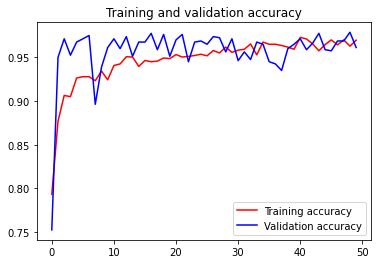

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
fig = plt.gcf()
fig.savefig('from_basic.png',dpi=fig.dpi)
plt.show()



In [13]:
from keras.models import load_model

model.save('from_basic2.h5')
model.save_weights('from_basic_weights.h5')

In [ ]:
testt=image_dataset_from_directory(
    save_path+'test/',
    labels="inferred",
    label_mode="int",
    class_names=['chin_mask', 'full_mask', 'no_mask', 'nose_mask'],
    color_mode="rgb",
    batch_size=10,
    shuffle=False,
    seed=1120
)

In [ ]:
type(testt)

In [ ]:
testt.shape

In [ ]:
dir(tensorflow.python.data.ops.dataset_ops.BatchDataset)